## Kumar Shekhar

## Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

##
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

## Objective :
They have contracted a consulting company to understand the factors on which the
demand for these shared bikes depends. Specifically, they want to understand the
factors affecting the demand for these shared bikes in the American market. The
company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### **Step 1: Reading and Understanding The Data**

In [2]:
# Importing Basic Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warrnings
import warnings
warnings.filterwarnings ('ignore')

# Importing Libraries Necessary For Model Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Reading File
bikeSharing = pd.read_csv("day.csv")

In [7]:
# Check Top 10 Entries
bikeSharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
# Checking total number of Rown & Columns
bikeSharing.shape

(730, 16)

##### __Inference ::__ 
##### __--> There Are 730 Rows & 16 Columns__

In [9]:
# Checking For Missing Values
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### __Inference ::__
##### __--> There Are No Missing Values In The Dataset & Majority Of The Variables Are Numerical__

##### 1.1    Dropping Columns That Are Not Required 

In [10]:
# As per problem Statement "The model should be built taking this 'cnt' as target variable."
# Hence Dropping "casual" & "registered" columns as these are irrelavant for data modelling
bikeSharing = bikeSharing.drop(['casual', 'registered'], axis= 'columns')

In [11]:
# "instant" field represents just the serial number, it is not useful for data modelling.
# Hence, dropping it
bikeSharing = bikeSharing.drop('instant', axis = 'columns')

In [12]:
# "dteday" field represents date, but month & year attributes are already present.
# Also, Exact Date doesn't seems to be attribute affecting the Model. 
# Hence, dropping it
bikeSharing = bikeSharing.drop('dteday', axis = 'columns')

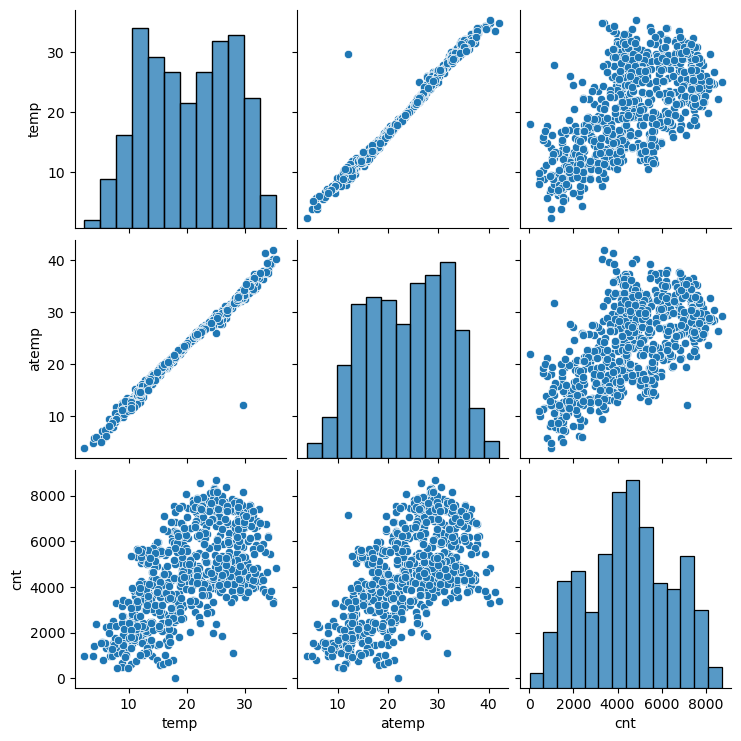

In [13]:
# Plotting Pair Plot to visualize corelation between temp & atemp
bikeSharing_Temperature = bikeSharing[['temp', 'atemp', 'cnt']]
sns.pairplot(bikeSharing_Temperature)
plt.show()

##### __Observation :__ 
##### 1. temp & atemp seems to be directly co-related with each other. Hence, any one can be used in the modelling. Dropping atemp attribute.
##### 2. There is some positive co-relation between temperature with Total Number of Rented Bikes

In [14]:
# Dropping "atemp" attribute
bikeSharing = bikeSharing.drop('atemp', axis = 'columns')

In [15]:
# Checking total number of Rown & Columns after Dropping Attributes
bikeSharing.shape

(730, 11)

##### __Inference ::__
##### __--> After dropping 2 columns, we have 730 Rows & 11 Columns__

In [16]:
# Checking Statistical Summary For All the Attributes
bikeSharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


#### __1.2 Visualization Of Data__

In [17]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


#### __1.2.1 Univariate Analysis__

<Axes: ylabel='windspeed'>

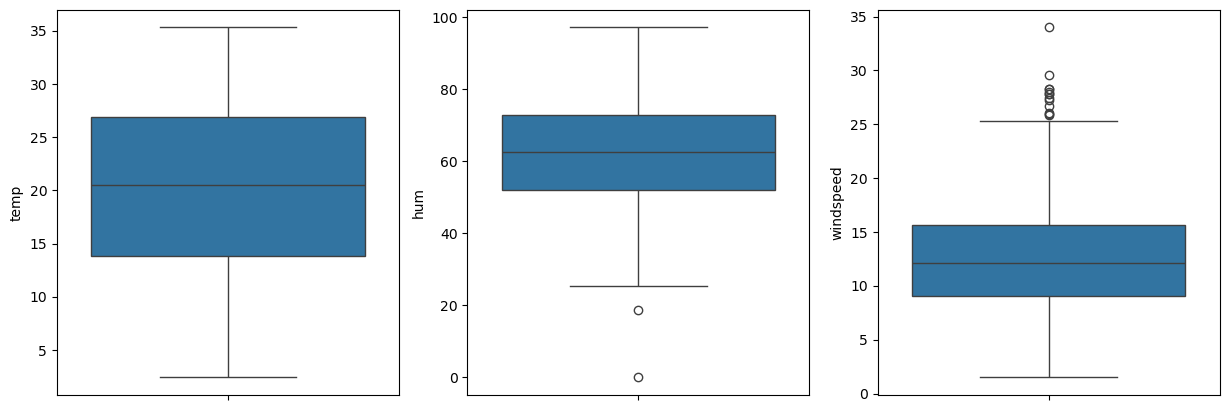

In [18]:
# Visualizing Contineous Variables

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(bikeSharing['temp'])

plt.subplot(1, 3, 2)
sns.boxplot(bikeSharing['hum'])

plt.subplot(1, 3, 3)
sns.boxplot(bikeSharing['windspeed'])

##### __Inference ::__
##### __--> There seems to be minor outliers in windspeed & hum. As its negligible, We will proceed with same data.__

In [19]:
# Differentiating variables
# Numeric/Continueous Variables
vars_cont = ['temp', 'hum', 'windspeed','cnt']

# Categorical variables
vars_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [20]:
#Checking dtype after conversion
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [21]:
# Visualizing Categorical Variables Using Pie Chart

## Putting lables Against Each Value As Per Data Dictonary For Better Representation On Pie Chart.

bikeSharing['season'] = bikeSharing['season'].map ({1:'spring', 2:'summer' , 3:'fall' , 4:'winter'})
#bikeSharing['yr'] = bikeSharing['yr'].map ({0: '2018', 1: '2019'})
bikeSharing['mnth'] = bikeSharing['mnth'].map ({1:'Jan', 2:'Feb' , 3:'Mar' , 4:'Apr', 5:'May' , 6:'Jun' , 7:'Jul', 8:'Aug' , 9:'Sep' , 10:'Oct', 11:'Nov' , 12:'Dec'})
#bikeSharing['holiday'] = bikeSharing['holiday'].map ({1:'Yes', 0:'No'})
bikeSharing['weekday'] = bikeSharing['weekday'].map ({0: 'Sun', 1:'Mon' , 2:'Tue' , 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
#bikeSharing['workingday'] = bikeSharing['workingday'].map ({1:'Yes', 0:'No'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map ({1:'Clear_Partly Cloudy', 2:'Mist_Cloudy' , 3:'Light Rain_Snow_Thunderstorm' , 4:'Heavy Rain_Snow_Thunderstorm'})
bikeSharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear_Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Partly Cloudy,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist_Cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,Mist_Cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,Mist_Cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,Clear_Partly Cloudy,10.489153,48.3333,23.500518,1796


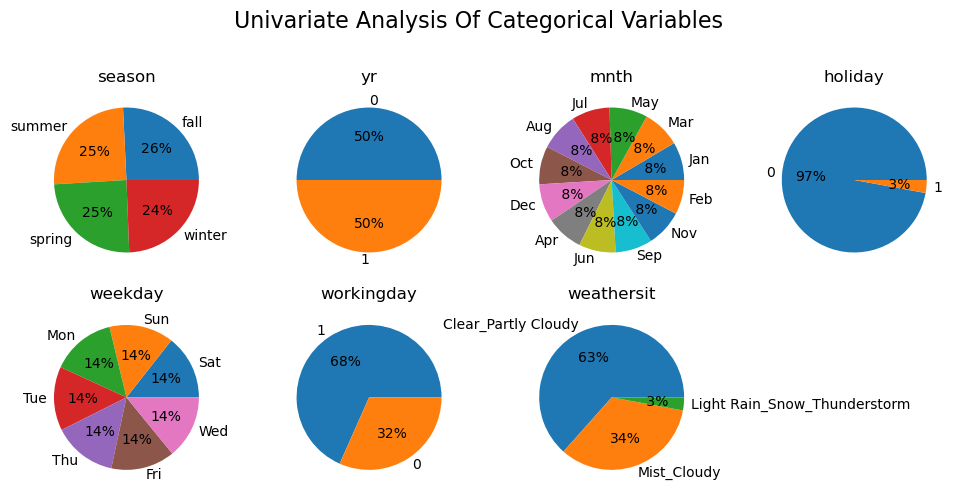

In [22]:
# making Pie Chart For Univariate Analysis Of Categorical variables

bikeSharing_Cat = bikeSharing[vars_cat]
#bikeSharing_Cat

plt.figure(figsize=(12,8))
plt.suptitle(' Univariate Analysis Of Categorical Variables', fontsize = 16)

for i in range (1, bikeSharing_Cat.shape[1]+1):
    plt.subplot(3,4,i)
    data = bikeSharing_Cat.iloc[:, i-1].value_counts(normalize=True).values
    index = bikeSharing_Cat.iloc[:, i-1].value_counts(normalize=True).index
    plt.pie(data, labels=index, autopct='%2.0f%%')
    currentAxes = plt.gca()
    currentAxes.set_title(bikeSharing_Cat.columns.values[i-1])
plt.show()

##### Inference ::
##### 1. Season : There is no significant change in Bike Renting on the basic of seasons. It remains almost same throughout the year.
##### 2. Year : Renting during 2018 & 2019 is same. 
##### 3. Months : Renting remains same every month. (8%)
##### 4. Holidays : Almost all renting is done during non-holiday days. Only 3% renting is done during holidays.
##### 5. Weekdays : Renting remains same every day of the week. (14%)
##### 6. Working Days : Majority Of business wad done during working days (68%)
##### 7. Weather : Alamost all renting is done when the wether is Clear/Partly Couldy (63%) or Mist + Cloudy (34%). No data is present for Heavy Snow/Rain.

#### __1.2.2 Bi-Variate Analysis__

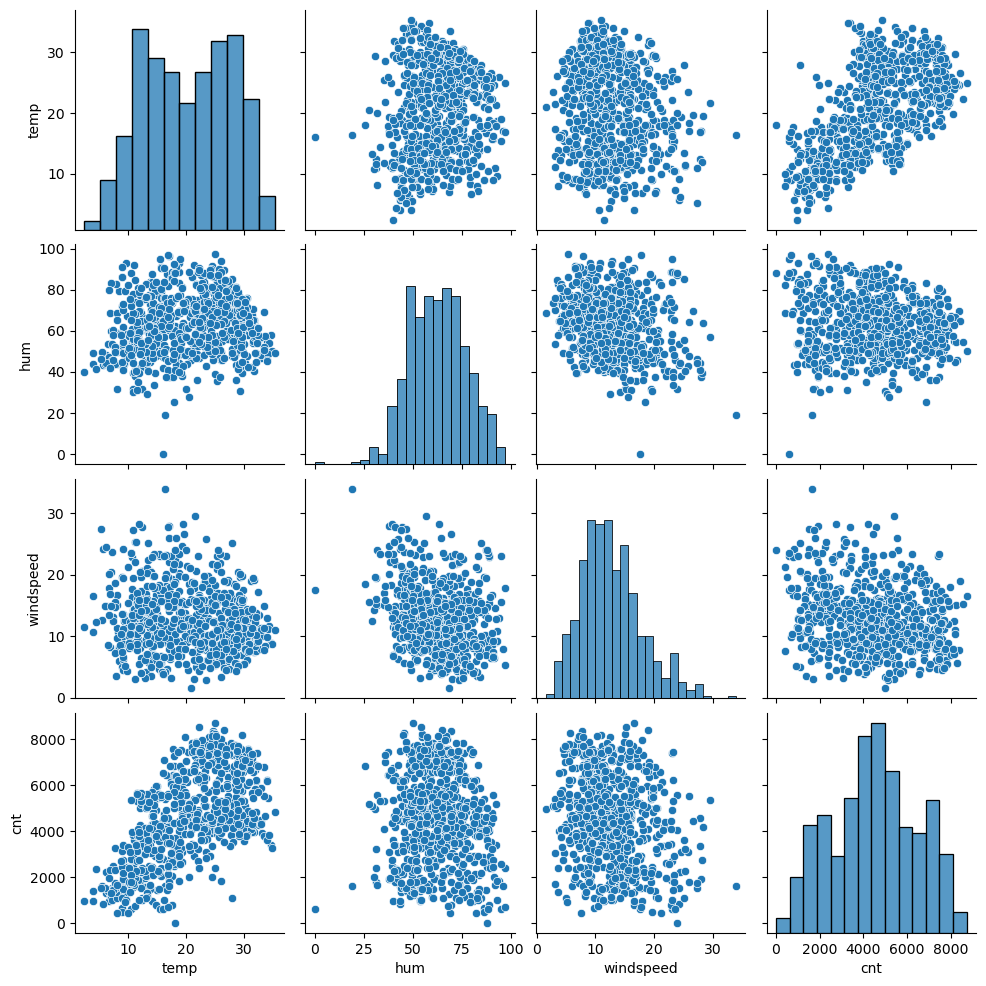

In [23]:
# Plotting Pair Plot to visualize Numerical Variable In The data set
sns.pairplot(bikeSharing[vars_cont])
plt.show()

#### __Observation :__ 
##### 1. There is some positive co-relation between temp and Total Number of Rented Bikes
##### 2. It is better to confirm the same using heatmap

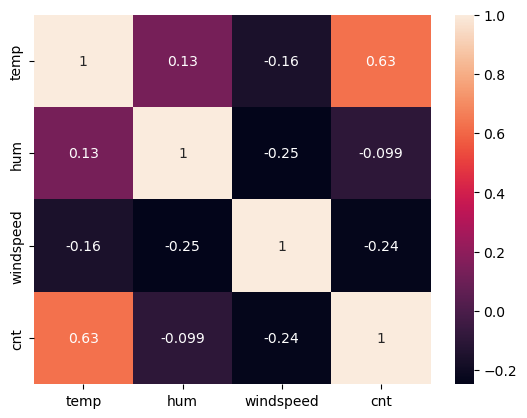

In [24]:
#plt.figure(figsize=(12,5))
sns.heatmap(bikeSharing[vars_cont].corr(), annot=True)
plt.show()

#### __Observation :__ 
##### 1. Temperature & Bike Renting has  positive co-relation (0.63)
##### 2. There is negative co-relation between Humidity & Windspeed with that of Bike Renting. (-099 & -0.24 respectively)

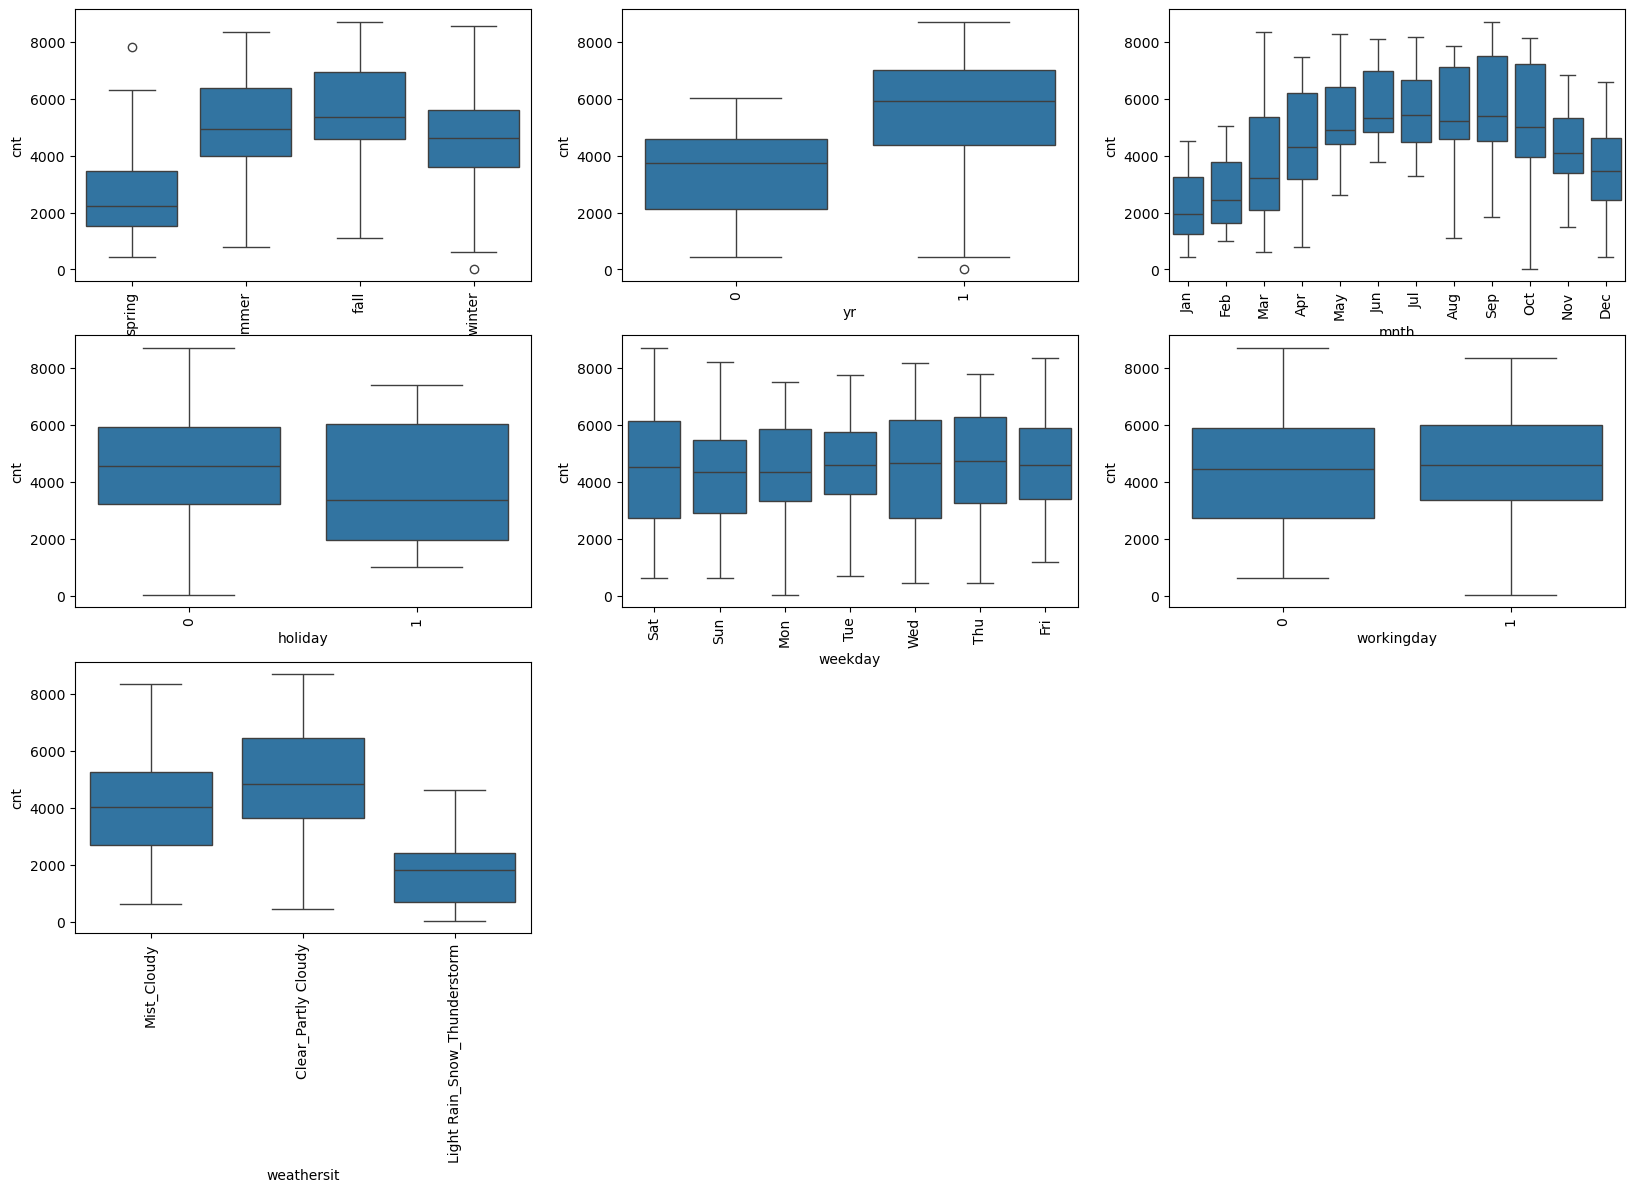

In [25]:
# Visualizing Categorical Variables

plt.figure(figsize=(20,12))

for i in list(enumerate(vars_cat)):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x=i[1], y ='cnt', data=bikeSharing)
    plt.xticks(rotation = 90)

plt.show()

##### __Inference :__ 
##### 1. Spring season is less preffered as compared to other seasons.
##### 2. Bike renting in 2019 is higher than that of 2018.
##### 3. Most of the demands seems to be during mid of the year. January observe lowest demand.
##### 4. Clearly, bike renting is more during non-holiday days.
##### 5. Demand of Bikes for rent remains almost constant throughout weekdays.
##### 6. There is no significant variance in bike renting in weekdays & working day.
##### 7. Most of the booking is done when weather is clear or partly cloudy, followed by Mist weather.
#####    _- There are negligible booking when there is light snow/rain._
#####    _- There is no booking at all when there is Heavy Rain/Thunderstorm._

### **Step 2 : Data Preparation For Modelling**

##### __2.1 Encoding Categorical Variables__

In [26]:
bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear_Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Partly Cloudy,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thu,1,Clear_Partly Cloudy,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,Mist_Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,Mist_Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,Clear_Partly Cloudy,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,Clear_Partly Cloudy,6.184153,48.2917,14.958889,1321


In [27]:
# Year, Holiday & Working Day are already in the form of 0 & 1. So no need for any encoding
# For other Categorical variables, dummy variables need to be created

##### __2.2 Creating Dummy Variables__

In [28]:
# Creating Dummy Variables for other categorical variables
dummyVar = pd.get_dummies(bikeSharing[['season', 'mnth','weekday','weathersit']], drop_first = True)
dummyVar

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
726,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
727,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
728,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [29]:
# Changing all Dummy variables to 0 & 1 format
dummyVar = dummyVar.astype('uint8')
dummyVar

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
# Concatinate with original dataset
bikeSharing = pd.concat([bikeSharing, dummyVar], axis=1)

# Dropping Categorical variables for which Dummy Variables are created
bikeSharing.drop(['season', 'mnth','weekday','weathersit'], axis = 1, inplace= True)


In [31]:
bikeSharing.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### __Inference ::_
##### __--> Dummy variables are appended in the original data set.__
##### __--> There are 29 attributes after dummy variable addition & redundent categorical variable removal.__

In [32]:
# Cross Checking Dtype of all the variables in the DataSet
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       730 non-null    int64  
 1   holiday                                  730 non-null    int64  
 2   workingday                               730 non-null    int64  
 3   temp                                     730 non-null    float64
 4   hum                                      730 non-null    float64
 5   windspeed                                730 non-null    float64
 6   cnt                                      730 non-null    int64  
 7   season_spring                            730 non-null    uint8  
 8   season_summer                            730 non-null    uint8  
 9   season_winter                            730 non-null    uint8  
 10  mnth_Aug                                 730 non-n

##### __2.3 Splitting Data Into Training & Testing Sets__

In [33]:
bikeSharing_train, bikeSharing_test = train_test_split(bikeSharing, train_size = 0.7, random_state = 15)
print(bikeSharing_train.shape)
print(bikeSharing_test.shape)

(510, 29)
(220, 29)


##### __2.4 Data Scaling (Training Data)__

In [34]:
#Scaling The Training Dataset

# Object Instantiation
scaler = MinMaxScaler()

# Fit and Transform On Training Data
bikeSharing_train[vars_cont] = scaler.fit_transform(bikeSharing_train[vars_cont])
bikeSharing_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
469,1,0,0,0.693052,0.523401,0.417954,0.841411,0,1,0,...,0,0,0,0,1,0,0,0,0,0
218,0,0,0,0.864985,0.775870,0.369214,0.421145,0,0,0,...,0,0,0,0,1,0,0,0,0,0
591,1,0,1,0.819629,0.638471,0.303830,0.868408,0,0,0,...,0,0,0,0,0,0,0,1,0,0
262,0,0,1,0.636093,0.908115,0.232053,0.403064,0,0,0,...,0,1,0,0,0,0,1,0,0,1
430,1,0,1,0.436735,0.528982,0.666680,0.563159,1,0,0,...,0,0,0,0,0,0,0,1,0,0


##### __Inference ::__
##### __--> All the numeric variables are scaled properly.__

##### __2.5 Splitting X & y For Training Datasets__

In [35]:
#Creating X & y data frame for training Data Set

y_train = bikeSharing_train.pop('cnt')
X_train = bikeSharing_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
469,1,0,0,0.693052,0.523401,0.417954,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
218,0,0,0,0.864985,0.775870,0.369214,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
591,1,0,1,0.819629,0.638471,0.303830,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
262,0,0,1,0.636093,0.908115,0.232053,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
430,1,0,1,0.436735,0.528982,0.666680,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### __Step 3 : Building The Model__

##### __3.1 RFE (Recursive Feature Elimination)__

In [36]:
# Listing all the Columns that we have 
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain_Snow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [37]:
# Running RFE with the output number of the variables equals 17

lm = LinearRegression()

#Fit Model
lm.fit(X_train, y_train)

#Run RFE
rfe = RFE(lm, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)


In [38]:

#getting the list  variables selected through RFE along with ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 9),
 ('weathersit_Light Rain_Snow_Thunderstorm', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [39]:
# Attributes Having Significance as calculated through  RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Light Rain_Snow_Thunderstorm', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [40]:
# Attributes that are not considered significant as per RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

##### __3.2 Building Model Using Stat Model with columns suggested by RFE__

In [41]:
#Creating X_test datafraame with RFE selected variables
X_train_rfe = X_train[col]

# using Stat method as it gives statistical data
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

#Running lenear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [42]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.15e-192
Time:                        22:51:51   Log-Likelihood:                 494.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     492   BIC:                            -877.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

##### __Inference ::__
##### __--> holiday has quite high P-value (0.167). So it is better to drop it__


In [43]:
#Dropping mnth_Aug as it has high p-value
X_train_new = X_train_rfe.drop(['holiday'], axis =1)


# Adding Constant
X_train_new = sm.add_constant(X_train_new)

#Running Leanear Model 
lm1 = sm.OLS(y_train, X_train_new).fit()

#Summary
print(lm1.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.56e-192
Time:                        22:51:59   Log-Likelihood:                 493.91
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     493   BIC:                            -881.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

##### __Inference ::__
##### __--> The P-value of all the parameters are in good range showing it to be significant.__
##### __--> Need to check VIF value to ensure significance is correct.__

In [44]:
# Create a dataframe that will contain the names of all the features variables and thier values

vif = pd.DataFrame()
vif['Features']= X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.01
3,temp,3.76
6,season_spring,3.69
7,season_winter,2.32
10,mnth_Jan,2.23
4,hum,1.99
9,mnth_Feb,1.78
12,mnth_Nov,1.78
16,weathersit_Mist_Cloudy,1.64
8,mnth_Dec,1.57


##### __Inference ::__
##### __--> VIF is also under good range (<5)__
##### __--> p-vlaue as well as the VIF for below variables are showing good significance.__

In [46]:
# Selected variable list
var_model = list(lm1.params.index)
var_model.remove('const')

print(var_model)

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat', 'weathersit_Light Rain_Snow_Thunderstorm', 'weathersit_Mist_Cloudy']


### __Step 4 : Residual Analysis : Model Evaluation On Train Set__

Text(0.5, 1.0, 'Error Terms')

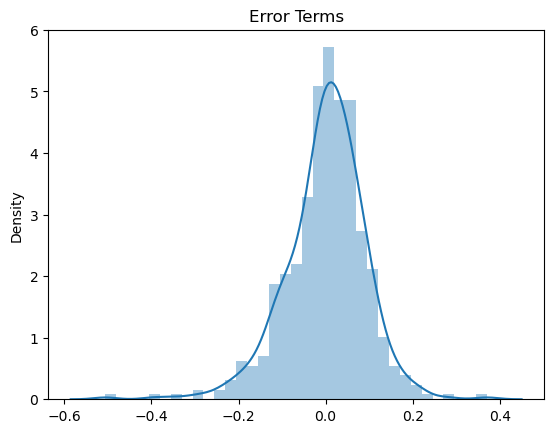

In [48]:

X_train_final = X_train[var_model]

#Add Constant
X_train_final = sm.add_constant(X_train_final)

#Residual Analysis
y_train_pred = lm1.predict(X_train_final)

# Calculating Residual
res = y_train - y_train_pred

#Plotting histogram to check mean value of error term
sns.distplot(res)
plt.title ("Error Terms")

##### __Inference ::__
##### __--> Distribution Plot Of The Error Terms Shows Mean At Zero indicating Normal Distribution__

Text(0.5, 0, 'Y Train Pred')

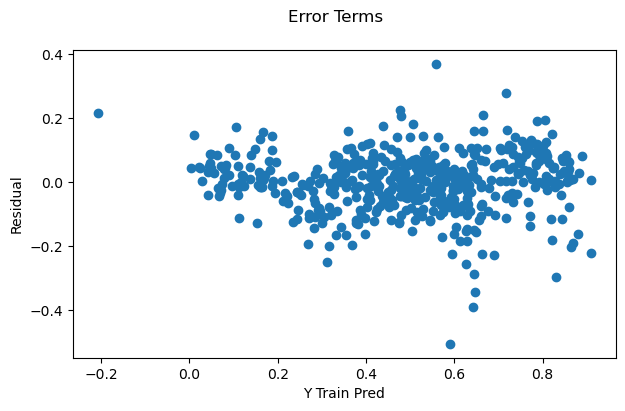

In [49]:
plt.figure (figsize = (7,4))
plt.scatter(y_train_pred, res)
plt.suptitle('Error Terms')
plt.ylabel ('Residual')
plt.xlabel('Y Train Pred')

##### __Inference ::__
##### __--> Error Terms are random in nature. No dependency on X or Y varible is observed.__
##### __--> Error Terms satisfies homoscedasticity.__

### __Step 5 : Evaluating Model On Test Set__

##### __5.1 : Scaling The Test Data (using Tranform function)__

In [50]:
# Scaling the test dat set using Transform function
bikeSharing_test[vars_cont] = scaler.transform(bikeSharing_test[vars_cont])
bikeSharing_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
699,1,0,0,0.302774,0.831258,0.076922,0.597690,0,0,1,...,0,0,0,1,0,0,0,0,0,1
717,1,0,1,0.346021,0.644483,0.333354,0.607233,0,0,1,...,0,0,0,0,0,0,0,1,0,0
297,0,0,1,0.522174,0.641907,0.297413,0.534405,0,0,1,...,1,0,0,0,0,0,1,0,0,0
407,1,0,0,0.086540,0.478746,0.797450,0.137870,1,0,0,...,0,0,0,0,1,0,0,0,0,0
444,1,0,1,0.598120,0.846286,0.138467,0.728152,0,1,0,...,0,0,0,0,0,0,0,1,0,1



##### __5.2 Evaluating Test Data On the Basis of coeffcients found with Train Data Set__

In [51]:

# y & X test Data
y_test = bikeSharing_test.pop('cnt')
X_test = bikeSharing_test

In [52]:

# Selected Final Variables as per Modelling result in test data sets
X_test_sm = X_test[var_model]

# Add constant to X test
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Sat,weathersit_Light Rain_Snow_Thunderstorm,weathersit_Mist_Cloudy
699,1.0,1,0,0.302774,0.831258,0.076922,0,1,1,0,0,0,0,0,1,0,1
717,1.0,1,1,0.346021,0.644483,0.333354,0,1,1,0,0,0,0,0,0,0,0
297,1.0,0,1,0.522174,0.641907,0.297413,0,1,0,0,0,0,0,0,0,0,0
407,1.0,1,0,0.086540,0.478746,0.797450,1,0,0,1,0,0,0,0,0,0,0
444,1.0,1,1,0.598120,0.846286,0.138467,0,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Error Terms')

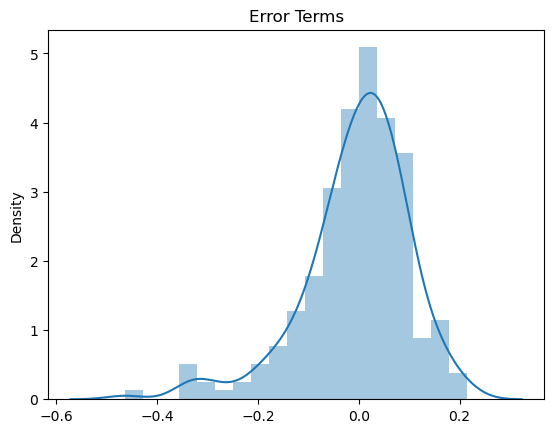

In [53]:
#predicting Result on test Set
y_test_pred = lm1.predict(X_test_sm)


# Calculating Residual
res = y_test - y_test_pred

#Plotting histogram to check mean value of error term
sns.distplot(res)
plt.title ("Error Terms")

##### __Inference ::__
##### __--> Distribution plot is same as that of Training  Data__
##### __--> Error Term has mean at Zero, showing normal distribution__

Text(0.5, 0, 'Y Test Pred')

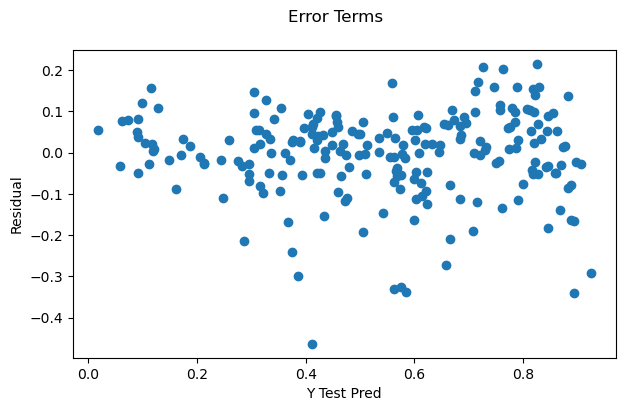

In [54]:
plt.figure (figsize = (7,4))
plt.scatter(y_test_pred, res)
plt.suptitle('Error Terms')
plt.ylabel ('Residual')
plt.xlabel('Y Test Pred')

##### __Inference ::__
##### __--> Error term is distributed randomly__

In [55]:
# Co-efficients 
print(round(lm1.params,3))

const                                      0.346
yr                                         0.251
workingday                                 0.037
temp                                       0.452
hum                                       -0.200
windspeed                                 -0.178
season_spring                             -0.099
season_winter                              0.096
mnth_Dec                                  -0.090
mnth_Feb                                  -0.051
mnth_Jan                                  -0.073
mnth_Jul                                  -0.048
mnth_Nov                                  -0.081
mnth_Sep                                   0.061
weekday_Sat                                0.038
weathersit_Light Rain_Snow_Thunderstorm   -0.232
weathersit_Mist_Cloudy                    -0.049
dtype: float64


## __Summary__

In [56]:
# Calculating R2 Score 
r2_score(y_true=y_test, y_pred = y_test_pred)

0.8229791184543551

In [57]:
# Calculating  Adjusted R2 Score
# Formula : 1 - [((1-r2)(N-1))/(N-p-1)]

r2_score_test = round((r2_score(y_true=y_test, y_pred = y_test_pred)),3)

# N = Sample size
N = len(X_test)

# p = Number of Predictor Variables
p = len(var_model)

adjusted_r2_score = round((1-((1-r2_score_test)*(N-1)/(N-p-1))), 3)
print ("R-Square : ", r2_score_test)
print("Adjusted R-Square : ", adjusted_r2_score)



R-Square :  0.823
Adjusted R-Square :  0.809


### __Observation ::__
#### __--> Variables Significant In Predicting Demand of Shared Bikes :__
#####    __1. Temperature (var name - temp, Weightage - 0.452)__
##### __2. Weather (var name - Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Weightage - -0.232)__
##### __3. Year (var name - yr,Weightage - 251)__
##### __4. Humidity (var name - hum, Weightage - -0.200)__

#### __--> Based on R Square & Adjusted R Square score, we can suffice that around 81% of Bike Demand Can Be Descrived By These variables.__